In [1]:
import json
import pandas as pd
import numpy as np

# import the built-in Python module for regular expressions.
import re

In [2]:
file_dir = 'C://Users/janas/OneDrive/Desktop/Data_Analytics/Module_8_ETL/Movies-ETL/'

In [3]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [7]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [9]:
wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
                  and 'imdb_link' in movie
                  and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [10]:
wiki_movies_df = pd.DataFrame(wiki_movies)

In [11]:
wiki_movies_df.columns.tolist()
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [13]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [14]:
def clean_movie(movie):
    ## movie_copy = dict(movie), OR...
    movie = dict(movie) ## create a non-destructive copy
    
    # Make an empty dict to hold all of the alternative titles.
    alt_titles = {}
    
    # Loop through a list of all alternative title keys.
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        # Check if the current key exists in the movie object.
        if key in movie:
            
            # If so, remove the key-value pair and add to the alternative titles dictionary.
            alt_titles[key] = movie[key]
            movie.pop(key)
    
    # After looping through every key, add the alternative titles dict to the movie object.
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # consolidate columns with the same data into one column.
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [15]:
# make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [16]:
# rerun our list comprehension to clean wiki_movies and recreate wiki_movies_df
wiki_movies_d = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [18]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

7076


In [21]:
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))

7033


In [22]:
# Get the count of null values for each column by using a list comprehension
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

# you could also use a for loop and print statement.

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Directed by', 2],
 ['Produced by', 360],
 ['Screenplay by', 4726],
 ['Story by', 6037],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Music by', 593],
 ['Cinematography', 691],
 ['Edited by', 694],
 ['Productioncompany ', 2532],
 ['Distributed by', 495],
 ['Release date', 193],
 ['Running time', 141],
 ['Country', 388],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Written by', 2490],
 ['Genre', 6923],
 ['Theme music composer', 6966],
 ['Country of origin', 6881],
 ['Original language(s)', 6875],
 ['Producer(s)', 6877],
 ['Editor(s)', 6887],
 ['Production company(s)', 6902],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Productioncompanies ', 6310],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Distributor', 6895],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Composer(s)', 7025],
 ['Crea

In [23]:
# make a list of columns that have less than 90% null values and use those to trim down our dataset.
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Productioncompanies ',
 'imdb_id']

In [24]:
# Select the columns we want to keep from our Pandas DataFrame as follows:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Productioncompanies,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,English,$12 million,"$7,331,647",Woody Allen,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,Paramount Pictures,"December 19, 1990",95 minutes,US,English,$25 million,"$6,939,946 (USA)",Paul Hogan,NaN,tt0099018


In [25]:
wiki_movies_df.dtypes

url                     object
year                     int64
imdb_link               object
title                   object
Directed by             object
Produced by             object
Screenplay by           object
Story by                object
Based on                object
Starring                object
Music by                object
Cinematography          object
Edited by               object
Productioncompany       object
Distributed by          object
Release date            object
Running time            object
Country                 object
Language                object
Budget                  object
Box office              object
Written by              object
Productioncompanies     object
imdb_id                 object
dtype: object

In [26]:
# look at rows where box office data is defined, so first we'll make a data series that drops missing values with the following:
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [27]:
# By using the map() method, we can see which values are not strings. First, make a is_not_a_string() function:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [28]:
# Having to create a new function every time we want to use the map() method is cumbersome 
# What we want is a stripped-down, one-line way of writing our functions.
# This is what lambda functions are made for. The lambda function version of is_not_a_string() is:
# lambda x: type(x) != str

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [29]:
some_list = ['One','Two','Three']
'Mississippi'.join(some_list)

'OneMississippiTwoMississippiThree'

In [30]:
# use a simple space as our joining character and apply the join() function 
#only when our data points are lists.

box_office= box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [31]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [32]:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3903

In [33]:
form_two = r'\$\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [34]:
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1550

In [35]:
matches_form_one_BO = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two_BO = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [36]:
box_office[~matches_form_one_BO & ~matches_form_two_BO]

34                         US$ 4,212,828
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
3088           $32 [2] –33.1 million [1]
3631                                 TBA
3859                  $38.9–40.3 million
3879            CN¥3.650 million (China)
4116                          £7,385,434
4261                  $20.7–23.9 million
4306                              $20-30
4561            

In [37]:
box_office = box_office.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

C:\Users\janas\anaconda3\envs\PythonData\lib\site-packages\pandas\core\strings\object_array.py:156: FutureWarning: Possible set difference at position 6
  pat = re.compile(pat, flags=flags)


In [38]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [39]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [40]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [41]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [43]:
# Create a budget variable.
budget = wiki_movies_df['Budget'].dropna()

In [44]:
# Convert any lists to strings:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [45]:
# Then remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [46]:
matches_form_one_BDGT = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two_BDGT = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one_BDGT & ~matches_form_two_BDGT]

136                          Unknown
204      60 million Norwegian Kroner
255                         $ 80,000
478                          Unknown
550     BEF 1 million ( USD$ 33,000)
973              $34 [3] [4] million
1035                         $ 3,000
1126                $120 [4] million
1226                         Unknown
1278                             HBO
1374                      £6,000,000
1397                      13 million
1446                    $ 24,000,000
1480                    £2.8 million
1734                    CAD2,000,000
1781        $ 15,000,000 (estimated)
1913      PHP 85 million (estimated)
1948                     102,888,900
1953                    3,500,000 DM
1972    $ 10,000,000 (approximately)
1973                      ₤2,300,874
2281                      $14 milion
2307          USD$ 10,000,000 (est.)
2443                   US$ 2,600,000
2451                      ₤6,350,000
3144                    € 40 million
3201                 US$ 855,000 [2]
3

In [47]:
# Remove the citation references with the following

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one_BDGT & ~matches_form_two_BDGT]

C:\Users\janas\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


136                          Unknown
204      60 million Norwegian Kroner
255                         $ 80,000
478                          Unknown
550     BEF 1 million ( USD$ 33,000)
973                      $34 million
1035                         $ 3,000
1126                    $120 million
1226                         Unknown
1278                             HBO
1374                      £6,000,000
1397                      13 million
1446                    $ 24,000,000
1480                    £2.8 million
1734                    CAD2,000,000
1781        $ 15,000,000 (estimated)
1913      PHP 85 million (estimated)
1948                     102,888,900
1953                    3,500,000 DM
1972    $ 10,000,000 (approximately)
1973                      ₤2,300,874
2281                      $14 milion
2307          USD$ 10,000,000 (est.)
2443                   US$ 2,600,000
2451                      ₤6,350,000
3144                    € 40 million
3201                    US$ 855,000 
3

In [48]:
# parse the budget values.
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [49]:
# dropo the original budge column.
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [50]:
# Parse the release date

In [51]:
# First, make a variable that holds the non-null values of Release date in the DataFrame, 
# converting lists to strings:

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [52]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [53]:
# And then we can extract the dates with:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [54]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [ ]:
# Parse running time.

In [55]:
# first, make a variable that holds the non-null values of Release date in the DataFrame, 
# converting lists to strings:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [56]:
# most of the entries just look like "100 minutes." Let's see how many running times look exactly like
# that by using string boundaries.

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [57]:
# Let's get a sense of what the other 366 entries look like.
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 364, dtype: object

In [58]:
# Let's make this more general by only marking the beginning of the string, and accepting other 
# abbreviations of "minutes" by only searching up to the letter "m."

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6876

In [59]:
# That accounts for 6,877 entries. The remaining 17 follow:

running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running time, dtype: object

In [60]:
# match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:
# 1. Start with one or more digits.
# 2. Have an optional space after the digit and before the letter "h."
# 3. Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
# 4. Have an optional space after the "hours" marker.
# 5. Have an optional number of digits for minutes.
# As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*"

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [61]:
# convert strings to numeric values.
# Because we may have captured empty strings, we'll use the to_numeric() method and set the errors 
# argument to 'coerce'.  Coercing the errors will turn the empty strings into Not a Number (NaN), 
# then we can use fillna() to change all the NaNs to zeros.

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [62]:
# apply a function that will convert the hour capture groups and minute capture groups to minutes 
# if the pure minutes capture group is zero, and save the output to wiki_movies_df:

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [63]:
# drop Running time from the dataset 
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [ ]:
# Clean the kaggle data.

In [64]:
# Because the Kaggle data came in as a CSV, check that all columns came in as correct data types.

kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [65]:
# Before converting "adult" and "video" columns, check that all values are either True or False.
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [66]:
# Keep rows where the adult column is False, then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [67]:
# look at the values of the video column:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [68]:
# To convert video datatype, use the following code:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [69]:
# The above code creates the Boolean column we want. We just need to assign it back to video:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [70]:
# For the numeric columns, use the to_numeric() method from Pandas. make sure the errors= argument 
# is set to 'raise', to know if there's any data that can't be converted to numbers.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [71]:
# convert release_date to datetime.
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [73]:
# Look at the ratings data using the info() method on the DataFrame.
# since the dataset has so many rows, set the null_counts option to True.

ratings.info(null_counts=True)

C:\Users\janas\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [74]:
# specify in to_datetime() that the origin is unix and the time unit is seconds.
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [75]:
# assign the above output to the timestamp column.
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

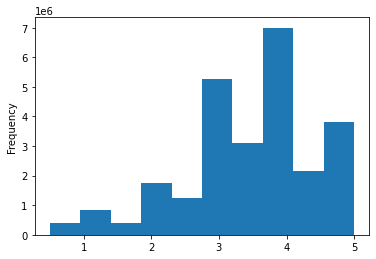

In [76]:
# to check for glaring errors, look at a histogram of the rating distributions and use the 
# describe() method to print out central tendency and spread stats.
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [108]:
# Print out a list of the columns to identify which ones are redundant. Use the suffixes parameter to 
# easily identify which table each column came from.

movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [ ]:
# Competing data:
# Wiki                     Kaggle                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle          drop wiki
# running_time             runtime               keep kaggle; fill in zeros with wikidata
# budget_wiki              budget_kaggle         keep kaggle; fill in zeros with wikidata
# box_office               revenue               keep kaggle; fill in zeros with wikidata
# release_date_wiki        release_date_kaggle   drop wikipedia
# Language                 original_language     drop wikipedia
# Production company(s)    production_companies  drop wikipedia

In [109]:
# look at the titles.
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [110]:
# Look at the rows where the titles don't match.
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [111]:
# Since kaggle data appears more consistent, confirm there are no missing titles in the Kaggle data.
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [ ]:
# so we'll drop the wiki title column.

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

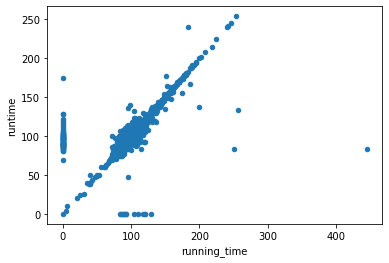

In [82]:
# Look at run times.  Fill in missing values with zero and make scatter plot
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [ ]:
# Notice there are more data points on the origin of the Y axis than on the origin of the X axis.
# since x axis is wiki and y axis is kaggle, wiki has more missing entries.
# Also, most runtimes are pretty close together but wiki has outliers.

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

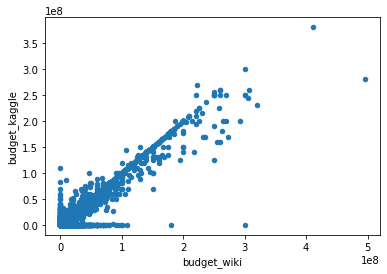

In [84]:
# make a scatter plot to compare budget values.
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [ ]:
# wiki data has more outliers, but there are many movies with no data in kaggle, where wiki does have 
# data in budget column.

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

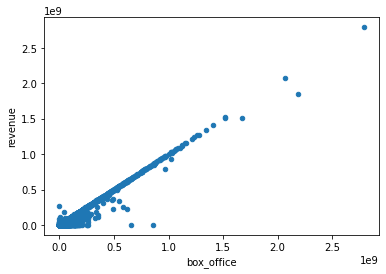

In [85]:
# make scatter plot to compare revenue
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

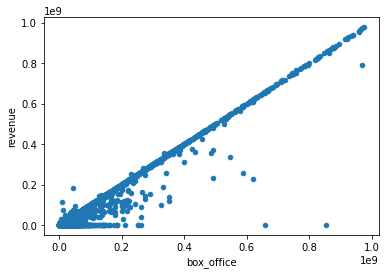

In [86]:
# look at the scatter plot for everything less than $1 billion in box_office.
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

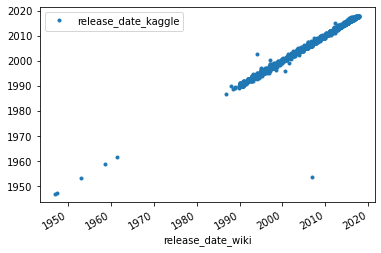

In [88]:
# Use regular line plot to plot date data, change style to only put dots.
movies_df[['release_date_wiki', 'release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [89]:
# investigate wild outlier around 2006 by choosing rough cut-off dates and looking for any movie with 
# wiki release date after 1996, but kaggle release date before 1965

movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,Nancy Meyers,"[Nancy Meyers, Bruce A. Block]",NaN,NaN,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [91]:
# "the Holiday" in wiki somehow merged with data from "From here" in Kaggle.
# first get index of that row.

movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [112]:
# then drop it from the dataframe.
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [115]:
# check for null values
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
22,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,1990-09-23,0.00,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Camp Cucamonga,False,4.70,9.00
24,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,1990-04-21,0.00,26.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Drugs don't stand a chance against these guys!,Cartoon All-Stars to the Rescue,False,6.00,5.00
28,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,1990-01-31,0.00,97.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Every year, Officer Donnelly goes to China Lak...",The China Lake Murders,False,0.00,0.00
186,https://en.wikipedia.org/wiki/Treasure_Island_...,1990,https://www.imdb.com/title/tt0100813/,Treasure Island,Fraser Clarke Heston,NaN,NaN,NaN,NaN,"[Charlton Heston, Christian Bale, Oliver Reed,...",...,1990-06-08,0.00,131.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sail the high seas. Battle the pirates. Live t...,Treasure Island,False,5.60,36.00
330,https://en.wikipedia.org/wiki/Perfect_Harmony_...,1991,https://www.imdb.com/title/tt0102653/,Perfect Harmony,Will Mackenzie,NaN,NaN,NaN,NaN,NaN,...,1991-03-31,0.00,89.00,[],Released,NaN,Perfect Harmony,False,3.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,2003-01-01,0.00,103.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,44 Minutes: The North Hollywood Shoot-Out,False,6.40,17.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,Bille August,NaN,NaN,NaN,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3390,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,2005-07-21,0.00,208.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bob Dylan. Songwriter. Rocker. Rebel. Legend.,No Direction Home: Bob Dylan,False,7.50,33.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,"[Gregg Kavet, Andy Robin]",NaN,NaN,NaN,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [116]:
# convert the lists in language to tuples so that the value_counts() method will work.
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [117]:
# There are no lists in kaggle data, so just run value_counts() on it.
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

In [119]:
movies_df[['Production company(s)','production_companies']]

KeyError: "['Production company(s)'] not in index"

In [102]:
# drop the title_wiki, release_date_wiki, language and production company(s) columns.
movies_df.drop(columns=['title_wiki','release_date_wiki','Language'], inplace=True)

In [120]:
# make a function that fills in missing data for a column pair and then drops the redundant column.
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [121]:
# run the function for the three column pairs that we decided to fill in zeros.fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,A Fantastic Woman,Sebastián Lelio,"[Juan de Dios Larraín, Pablo Larraín]",NaN,NaN,NaN,"[Daniela Vega, Francisco Reyes]",...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,Permission,Brian Crano,"[Brian Crano, Rebecca Hall]",NaN,NaN,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Loveless,Andrey Zvyagintsev,"[Alexander Rodnyansky, Sergey Melkumov, Gleb F...","[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,Gemini,Aaron Katz,"[Mynette Louie, Sara Murphy, Adele Romanski]",NaN,NaN,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [122]:
# check that there are no columns with only one value; don't forget to convert lists to tuples for value_counts() to work.

for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [123]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [124]:
#re-order the columns.
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

KeyError: "['Distributor', 'Producer(s)', 'Director', 'Editor(s)', 'Writer(s)', 'Composer(s)'] not in index"